In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [8]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
merged_data = transactions.merge(customers, on='CustomerID')
customer_profile = merged_data.groupby('CustomerID').agg({'TotalValue': 'sum','TransactionID': 'count','ProductID': 'nunique',  }
).reset_index().rename(columns={'TransactionID': 'TransactionCount', 'ProductID': 'UniqueProducts'})

In [9]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(customer_profile[['TotalValue', 'TransactionCount', 'UniqueProducts']])

best_score = -1
best_num_clusters = 0

In [10]:
num_clusters_range = range(2, 11)
for n_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features_scaled)

    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    db_index = davies_bouldin_score(features_scaled, cluster_labels)

    print(f'Clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.4f}, DB Index: {db_index:.4f}')

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_num_clusters = n_clusters
        best_kmeans_model = kmeans

print(f'\nBest Silhouette Score: {best_score:.4f} with Clusters: {best_num_clusters}')

Clusters: 2, Silhouette Score: 0.4859, DB Index: 0.7327
Clusters: 3, Silhouette Score: 0.4323, DB Index: 0.7636
Clusters: 4, Silhouette Score: 0.3744, DB Index: 0.9182
Clusters: 5, Silhouette Score: 0.3847, DB Index: 0.9246
Clusters: 6, Silhouette Score: 0.3937, DB Index: 0.8152
Clusters: 7, Silhouette Score: 0.3879, DB Index: 0.8450
Clusters: 8, Silhouette Score: 0.3738, DB Index: 0.8547
Clusters: 9, Silhouette Score: 0.3978, DB Index: 0.8094
Clusters: 10, Silhouette Score: 0.3839, DB Index: 0.8659

Best Silhouette Score: 0.4859 with Clusters: 2


In [11]:
best_kmeans_model = KMeans(n_clusters=best_num_clusters, random_state=42)
customer_profile['Cluster'] = best_kmeans_model.fit_predict(features_scaled)

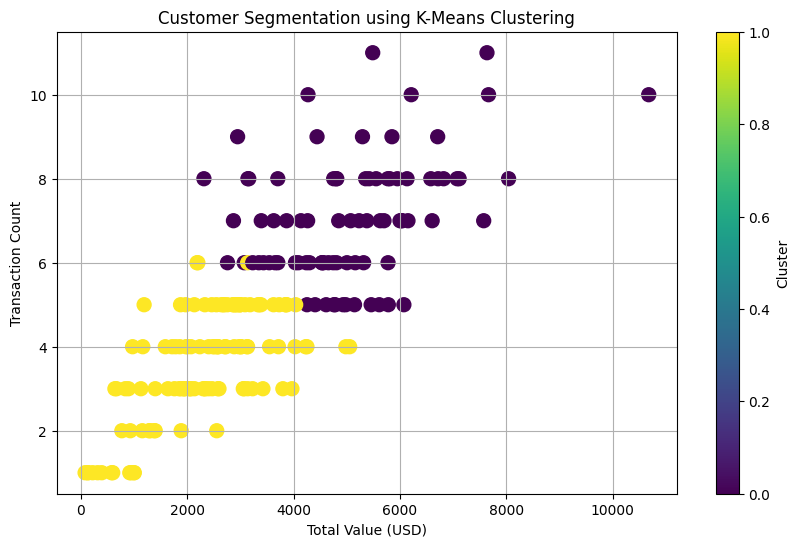

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(customer_profile['TotalValue'], customer_profile['TransactionCount'], c=customer_profile['Cluster'], cmap='viridis', s=100)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Total Value (USD)')
plt.ylabel('Transaction Count')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (5) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615:

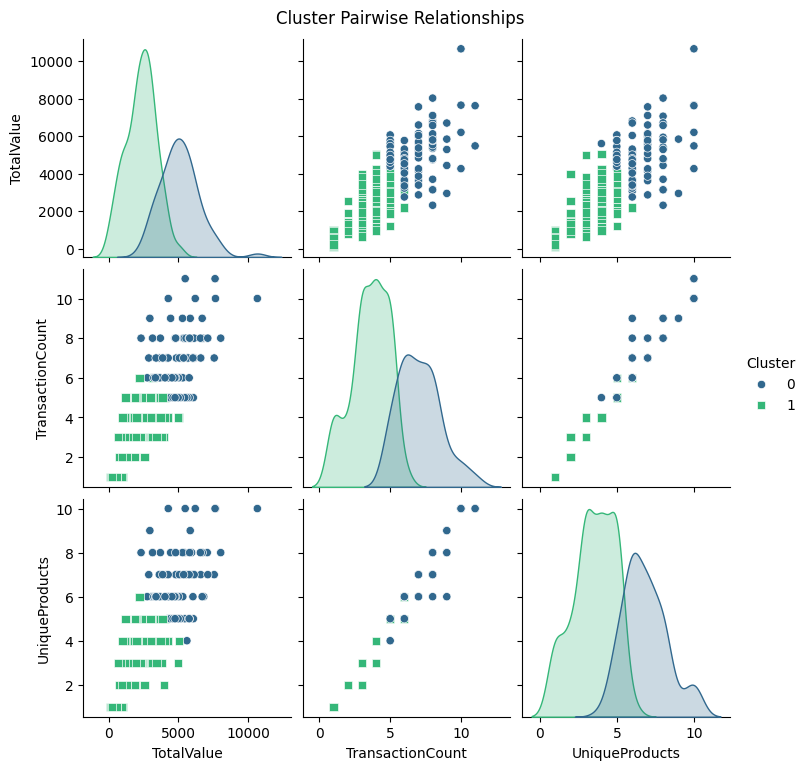

In [15]:
sns.pairplot(customer_profile, vars=['TotalValue', 'TransactionCount', 'UniqueProducts'], hue='Cluster', palette='viridis', diag_kind='kde', markers=['o', 's', 'D', 'X', '^'])
plt.suptitle('Cluster Pairwise Relationships', y=1.02)
plt.show()


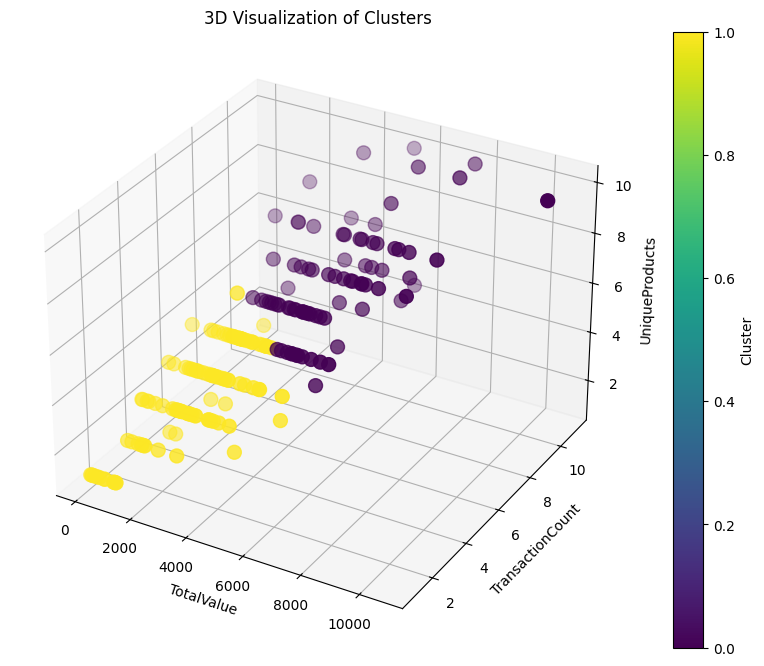

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    customer_profile['TotalValue'],
    customer_profile['TransactionCount'],
    customer_profile['UniqueProducts'],
    c=customer_profile['Cluster'],
    cmap='viridis',
    s=100
)

ax.set_title('3D Visualization of Clusters')
ax.set_xlabel('TotalValue')
ax.set_ylabel('TransactionCount')
ax.set_zlabel('UniqueProducts')
fig.colorbar(scatter, label='Cluster')
plt.show()
